In [22]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
# Caminho para o arquivo CSV
caminho_arquivo = caminho_arquivo = r'C:\Users\55219\OneDrive - Universidade do Estado do Rio de Janeiro\PROJETO DE GRADUAÇÃO\Projeto Novo - Machine Learning\Bases Tratadas\ConsolidadoGeral_v10.csv'


# Carregando os dados em um DataFrame do Pandas, especificando a vírgula como separador decimal
df = pd.read_csv(caminho_arquivo, sep=';')

# Exibindo as primeiras linhas dos dados para verificar se foram carregados corretamente
df.head()

,ano_0,ano_1,ano_2,ano_3,Mun,UF,pop_tot_0,pop_tot_1,pop_tot_2,pop_tot_3,...,pib_2,pib_3,pib_pc_0,pib_pc_1,pib_pc_2,pib_pc_3,idhm_0,idhm_1,idhm_2,idhm_3
0,2021,2020,2019,2018,Acrelândia,AC,15721,15490,15256,15020,...,253152,253138,19525,19525,16594,16853,0.76,0.74,0.73,0.72
1,2020,2019,2018,2017,Acrelândia,AC,15490,15256,15020,14366,...,253138,229644,19525,16594,16853,15985,0.74,0.73,0.72,0.70
2,2019,2018,2017,2016,Acrelândia,AC,15256,15020,14366,14120,...,229644,239610,16594,16853,15985,16970,0.73,0.72,0.70,0.69
3,2018,2017,2016,2015,Acrelândia,AC,15020,14366,14120,13869,...,239610,212961,16853,15985,16970,15355,0.72,0.70,0.69,0.67
4,2017,2016,2015,2014,Acrelândia,AC,14366,14120,13869,13613,...,212961,207822,15985,16970,15355,15266,0.70,0.69,0.67,0.66


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64304 entries, 0 to 64303
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ano_0             64304 non-null  int64  
 1   ano_1             64304 non-null  int64  
 2   ano_2             64304 non-null  int64  
 3   ano_3             64304 non-null  int64  
 4   Mun               64304 non-null  object 
 5   UF                64304 non-null  object 
 6   pop_tot_0         64304 non-null  int64  
 7   pop_tot_1         64304 non-null  int64  
 8   pop_tot_2         64304 non-null  int64  
 9   pop_tot_3         64304 non-null  int64  
 10  lig_ativas_0      64304 non-null  int64  
 11  lig_ativas_1      64304 non-null  int64  
 12  lig_ativas_2      64304 non-null  int64  
 13  lig_ativas_3      64304 non-null  int64  
 14  eco_ativas_0      64304 non-null  int64  
 15  eco_ativas_1      64304 non-null  int64  
 16  eco_ativas_2      64304 non-null  int64 

In [15]:
# Transformando as variáveis 'Mun' e 'UF' em categóricas
df['Mun'] = df['Mun'].astype('category')
df['UF'] = df['UF'].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64304 entries, 0 to 64303
Data columns (total 74 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ano_0             64304 non-null  int64   
 1   ano_1             64304 non-null  int64   
 2   ano_2             64304 non-null  int64   
 3   ano_3             64304 non-null  int64   
 4   Mun               64304 non-null  category
 5   UF                64304 non-null  category
 6   pop_tot_0         64304 non-null  int64   
 7   pop_tot_1         64304 non-null  int64   
 8   pop_tot_2         64304 non-null  int64   
 9   pop_tot_3         64304 non-null  int64   
 10  lig_ativas_0      64304 non-null  int64   
 11  lig_ativas_1      64304 non-null  int64   
 12  lig_ativas_2      64304 non-null  int64   
 13  lig_ativas_3      64304 non-null  int64   
 14  eco_ativas_0      64304 non-null  int64   
 15  eco_ativas_1      64304 non-null  int64   
 16  eco_ativas_2      6430

In [17]:
# Separarando os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
train_size = int(len(df) * 0.8)
train_data, test_data = df[:train_size], df[train_size:]

# Separarando os conjuntos de recursos (X) e alvo (y) para treinamento e teste
colunas_recursos = ['ano_0', 'ano_1', 'ano_2', 'ano_3', 'Mun', 'UF',
                    'pop_tot_0', 'pop_tot_1', 'pop_tot_2', 'pop_tot_3',
                    'lig_ativas_0', 'lig_ativas_1', 'lig_ativas_2', 'lig_ativas_3',
                    'eco_ativas_0', 'eco_ativas_1', 'eco_ativas_2', 'eco_ativas_3',
                    'ext_rede_0', 'ext_rede_1', 'ext_rede_2', 'ext_rede_3',
                    'vol_prod_0', 'vol_prod_1', 'vol_prod_2', 'vol_prod_3',
                    'vol_cons_0', 'vol_cons_1', 'vol_cons_2', 'vol_cons_3',
                    'vol_fatu_0', 'vol_fatu_1', 'vol_fatu_2', 'vol_fatu_3',
                    'lig_tot_ativ_0', 'lig_tot_ativ_1', 'lig_tot_ativ_2', 'lig_tot_ativ_3',
                    'ind_perd_fatu_0', 'ind_perd_fatu_1', 'ind_perd_fatu_2', 'ind_perd_fatu_3',
                    'ind_perd_distr_0', 'ind_perd_distr_1', 'ind_perd_distr_2','ind_perd_distr_3',
                    'ind_perd_lin_0', 'ind_perd_lin_1', 'ind_perd_lin_2', 'ind_perd_lin_3',
                    'ind_perd_lig_0', 'ind_perd_lig_1', 'ind_perd_lig_2', 'ind_perd_lig_3',
                    'ind_cons_0', 'ind_cons_1', 'ind_cons_2', 'ind_cons_3',
                    'cons_med_eco_0', 'cons_med_eco_1', 'cons_med_eco_2', 'cons_med_eco_3',
                    'pib_0', 'pib_1', 'pib_2', 'pib_3',
                    'pib_pc_0', 'pib_pc_1', 'pib_pc_2', 'pib_pc_3',
                    'idhm_0', 'idhm_1', 'idhm_2', 'idhm_3']


X_train = train_data[colunas_recursos]
y_train = train_data[colunas_alvo]

X_test = test_data[colunas_recursos]
y_test = test_data[colunas_alvo]

# Verificando o tamanho dos conjuntos de treinamento e teste
print("Número de amostras no conjunto de treinamento:", len(X_train))
print("Número de amostras no conjunto de teste:", len(X_test))

Número de amostras no conjunto de treinamento: 51443
Número de amostras no conjunto de teste: 12861


In [20]:
xgb_model = xgb.XGBRegressor(enable_categorical=True)

# Definindo a grade de hiperparâmetros a serem testados
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árvores de decisão no modelo
    'max_depth': [3, 6, 9],  # Profundidade máxima da árvore
    'learning_rate': [0.01, 0.1, 0.3]  # Taxa de aprendizado do modelo
}

# Definindo a estratégia de validação cruzada (neste caso, usando KFold com 5 folds)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error', refit=True)

# Ajustando o modelo
grid_result = grid_search.fit(X_train, y_train)

# Obtendo os melhores hiperparâmetros
best_params = grid_result.best_params_
print("Melhores hiperparâmetros encontrados:", best_params)

# Avaliando o desempenho do modelo com os melhores hiperparâmetros nos dados de teste
best_model = grid_result.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Desempenho do modelo nos dados de teste:", test_score)

Melhores hiperparâmetros encontrados: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}
Desempenho do modelo nos dados de teste: 0.9999305751059115


In [23]:
# Fazendo previsões nos dados de teste
y_pred = best_model.predict(X_test)

# Calcular o MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calcular o RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calcular o R²
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Calcular o MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.0220299649517921
Root Mean Squared Error (RMSE): 0.14842494720158098
R² Score: 0.9999305751059115
Mean Absolute Error (MAE): 0.0698206787157185


In [38]:
# Adicionar os dados reais ao DataFrame de teste
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Real_0'] = y_test['ind_perd_distr_0'].values
X_test_with_predictions['Real_1'] = y_test['ind_perd_distr_1'].values
X_test_with_predictions['Real_2'] = y_test['ind_perd_distr_2'].values
X_test_with_predictions['Real_3'] = y_test['ind_perd_distr_3'].values

# Adicionar as previsões ao DataFrame de teste
X_test_with_predictions['Pred_0'] = y_pred[:, 0]
X_test_with_predictions['Pred_1'] = y_pred[:, 1]
X_test_with_predictions['Pred_2'] = y_pred[:, 2]
X_test_with_predictions['Pred_3'] = y_pred[:, 3]

# Salvar o DataFrame resultante em um arquivo CSV
caminho_saida =r'C:\Users\55219\OneDrive - Universidade do Estado do Rio de Janeiro\PROJETO DE GRADUAÇÃO\Projeto Novo - Machine Learning/resultadoprevisão.csv'
X_test_with_predictions.to_csv(caminho_saida, index=False)

In [63]:
# Ajustar o modelo aos dados de treinamento
xgb_model.fit(X_train, y_train)

# Realizar previsões nos dados de treinamento
y_train_pred = xgb_model.predict(X_train)

# Adicionar os dados reais e as previsões ao DataFrame de treinamento
X_train_with_predictions = X_train.copy()
X_train_with_predictions['Real_0'] = y_train['ind_perd_distr_0'].values
X_train_with_predictions['Real_1'] = y_train['ind_perd_distr_1'].values
X_train_with_predictions['Real_2'] = y_train['ind_perd_distr_2'].values
X_train_with_predictions['Real_3'] = y_train['ind_perd_distr_3'].values
X_train_with_predictions['Pred_0'] = y_train_pred[:, 0]
X_train_with_predictions['Pred_1'] = y_train_pred[:, 1]
X_train_with_predictions['Pred_2'] = y_train_pred[:, 2]
X_train_with_predictions['Pred_3'] = y_train_pred[:, 3]

# Salvar o DataFrame resultante em um arquivo CSV
caminho_saida_treino = r'C:\Users\55219\OneDrive - Universidade do Estado do Rio de Janeiro\PROJETO DE GRADUAÇÃO\Projeto Novo - Machine Learning/resultadoprevisãotreinamento.csv'
X_train_with_predictions.to_csv(caminho_saida_treino, index=False)

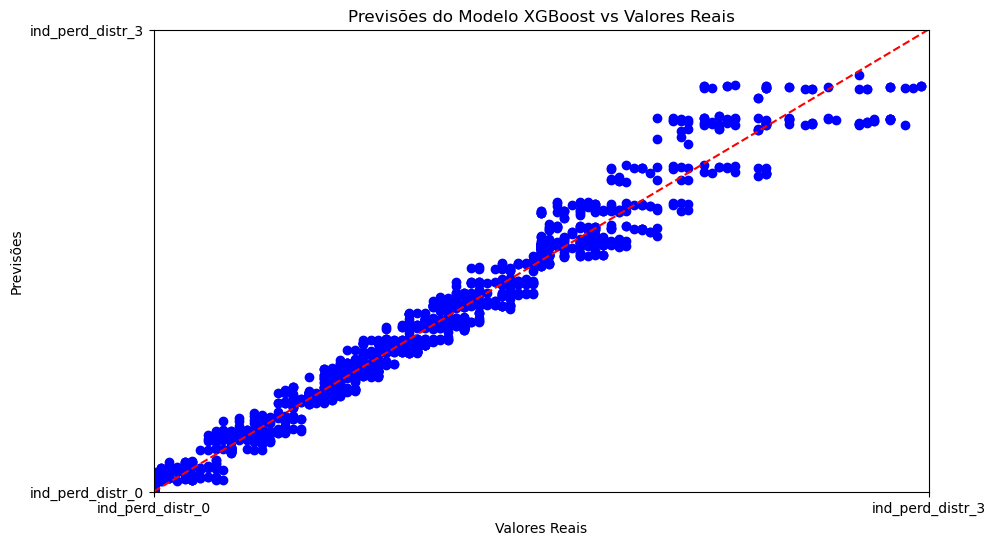

In [24]:
# Visualizar as previsões
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Previsões do Modelo XGBoost vs Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.xlim(min(y_test), max(y_test))  # Limitar a escala no eixo x
plt.ylim(min(y_test), max(y_test))  # Limitar a escala no eixo y
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha de referência
plt.show()

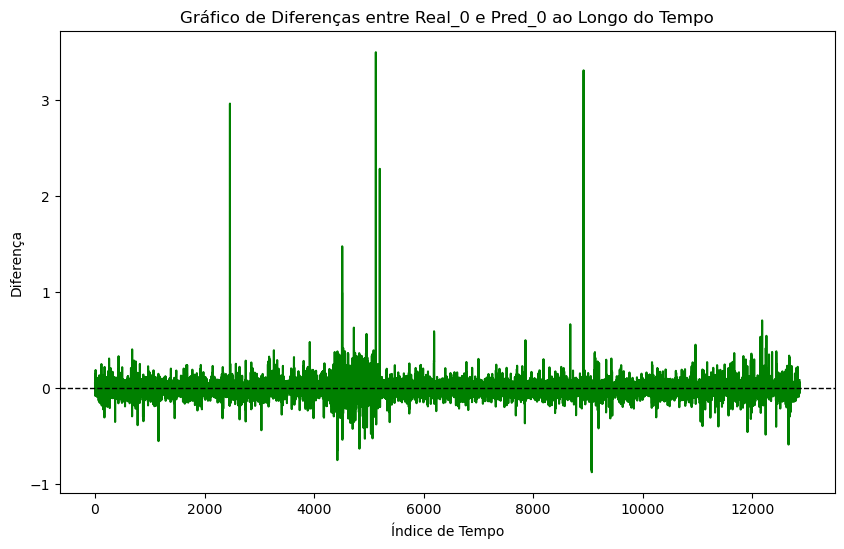

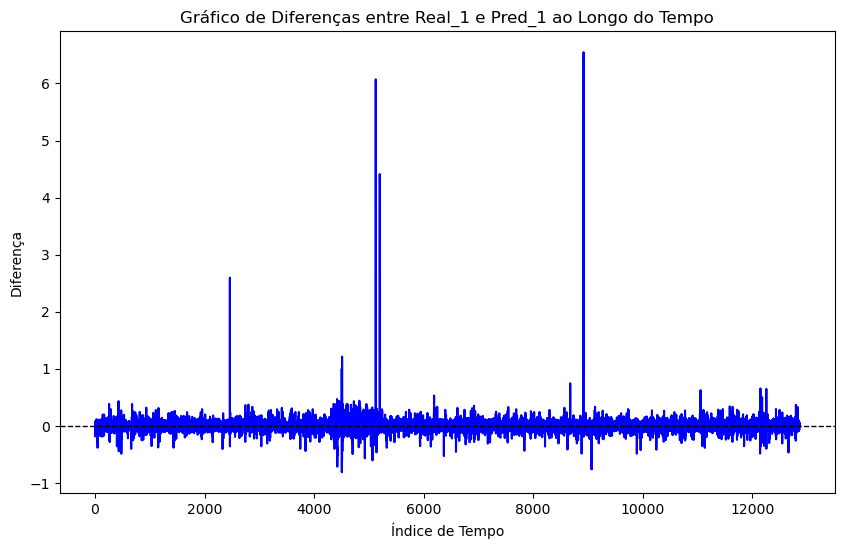

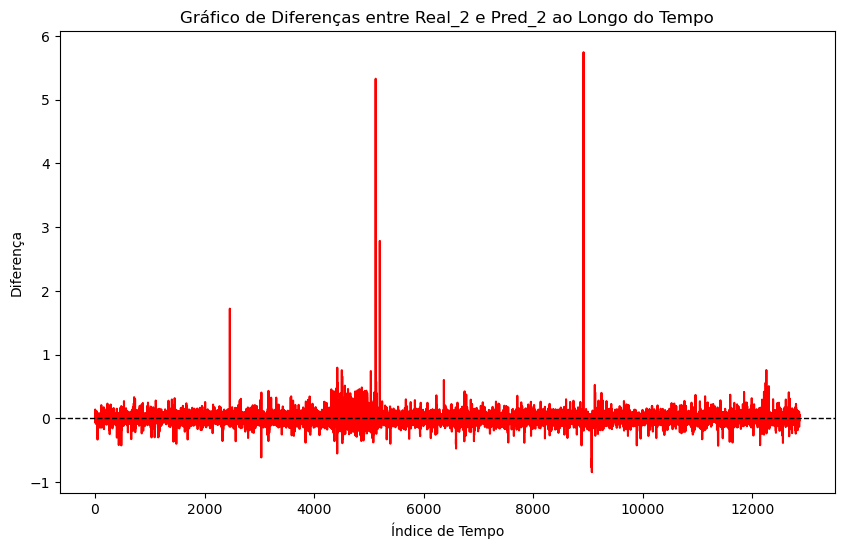

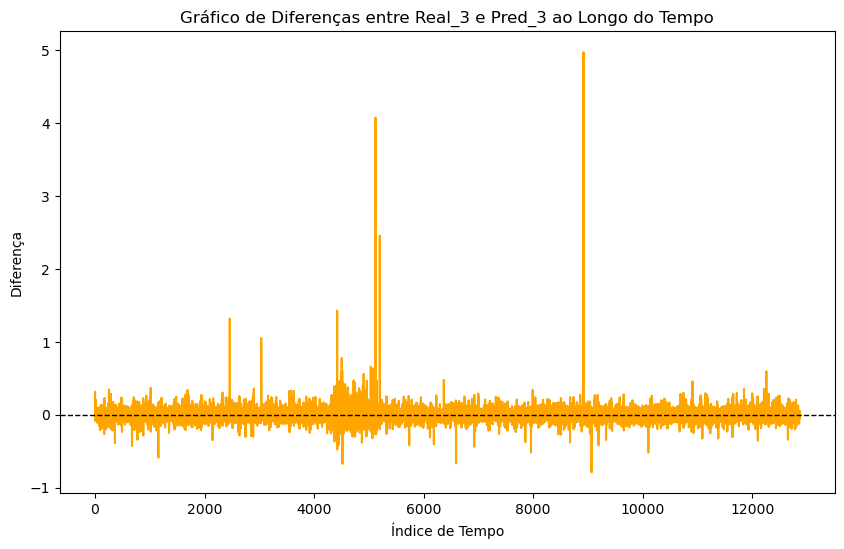

In [67]:
# Criar um índice de tempo com base no número de linhas do DataFrame de teste
time_index = range(1, len(X_test_with_predictions) + 1)

# Lista de cores para os gráficos
colors = ['green', 'blue', 'red', 'orange']

# Plotar gráficos de diferenças para cada par de variáveis real e previsto
for i in range(4):
    plt.figure(figsize=(10, 6))
    plt.plot(time_index, X_test_with_predictions[f'Real_{i}'] - X_test_with_predictions[f'Pred_{i}'], color=colors[i])
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Adicionar uma linha horizontal em y=0
    plt.xlabel('Índice de Tempo')
    plt.ylabel('Diferença')
    plt.title(f'Gráfico de Diferenças entre Real_{i} e Pred_{i} ao Longo do Tempo')
    plt.show()